## Wine Quality Prediction


        -Objective: Predict the quality of wine on a scale (e.g., 0 to 10) based on physicochemical properties such as acidity, pH, alcohol content, and sugar levels.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [3]:
# Load the white wine dataset
file_path_white = 'd:/Coding/Python/winequality-white-fixed.csv'
data_white = pd.read_csv(file_path_white)

# Display the first few rows
print(data_white.head())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6 

## Perform EDA

1. Target Variable Analysis(quality)

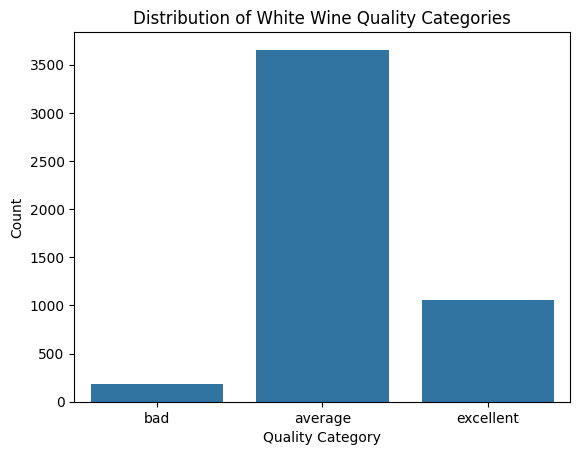

In [4]:
# Define bins and labels for quality scores
bins = [0, 4, 6, 10]
labels = ['bad', 'average', 'excellent']

# Create a new column 'quality_category' with binned quality scores
data_white['quality_category'] = pd.cut(data_white['quality'], bins=bins, labels=labels)

# Plot the distribution of quality categories
sns.countplot(x='quality_category', data=data_white)
plt.title('Distribution of White Wine Quality Categories')
plt.xlabel('Quality Category')
plt.ylabel('Count')
plt.show()

2. Feature-Target Relationship

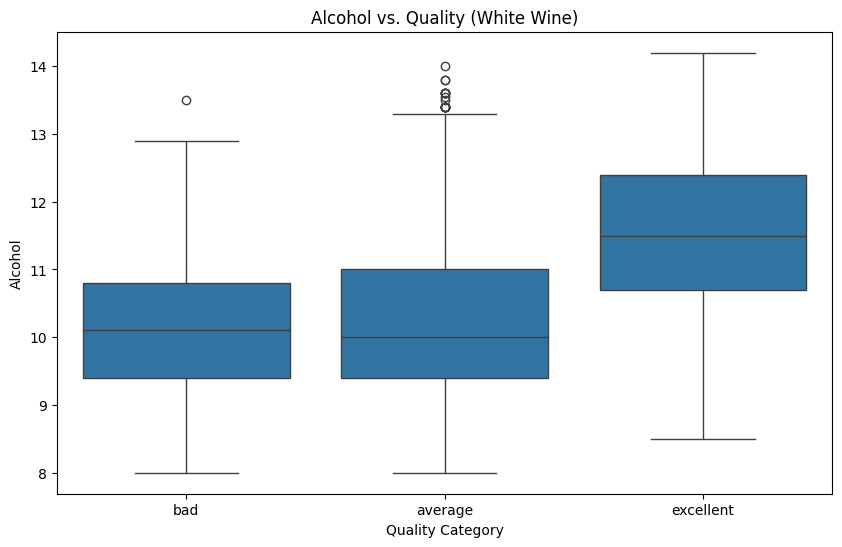

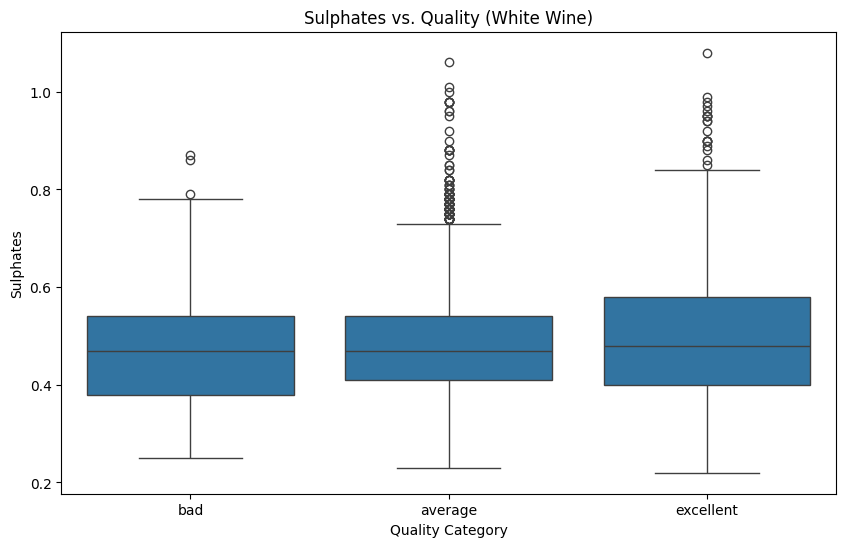

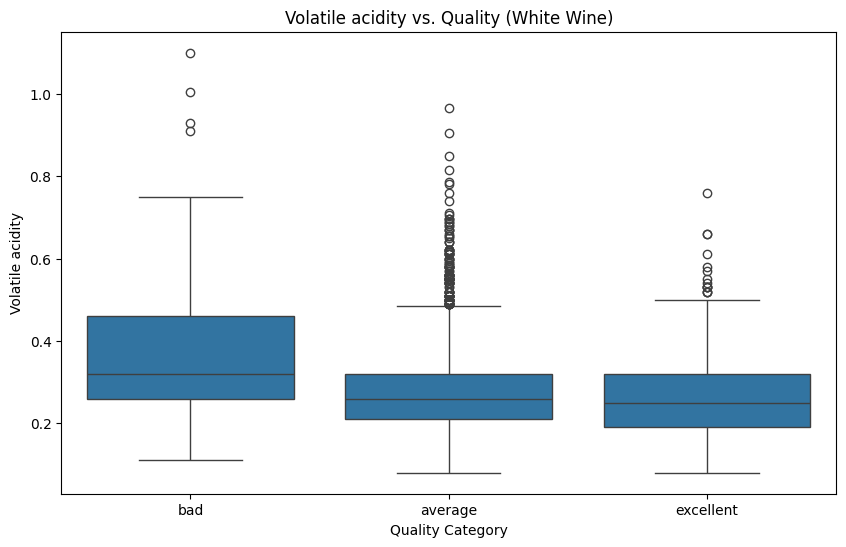

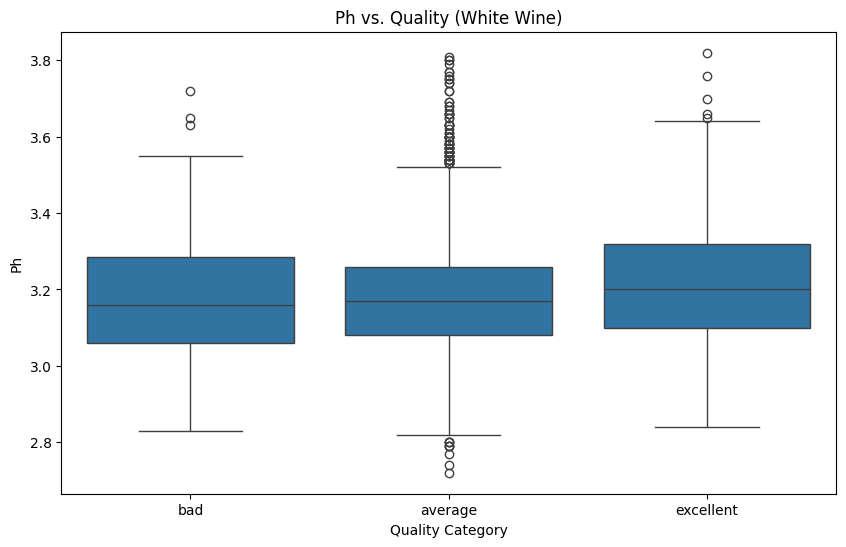

In [5]:
# Key Features vs. Quality
key_features = ['alcohol', 'sulphates', 'volatile acidity', 'pH']

for feature in key_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='quality_category', y=feature, data=data_white)
    plt.title(f'{feature.capitalize()} vs. Quality (White Wine)')
    plt.xlabel('Quality Category')
    plt.ylabel(feature.capitalize())
    plt.show()

Feature Interactions

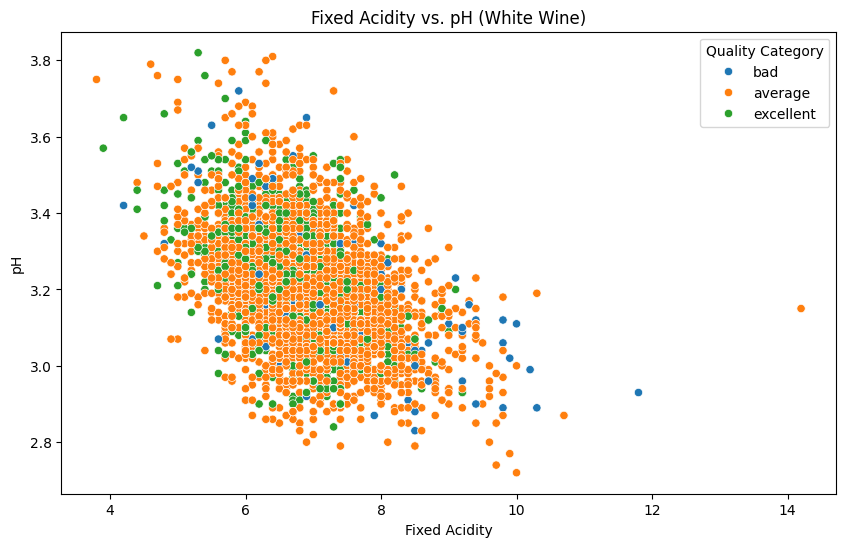

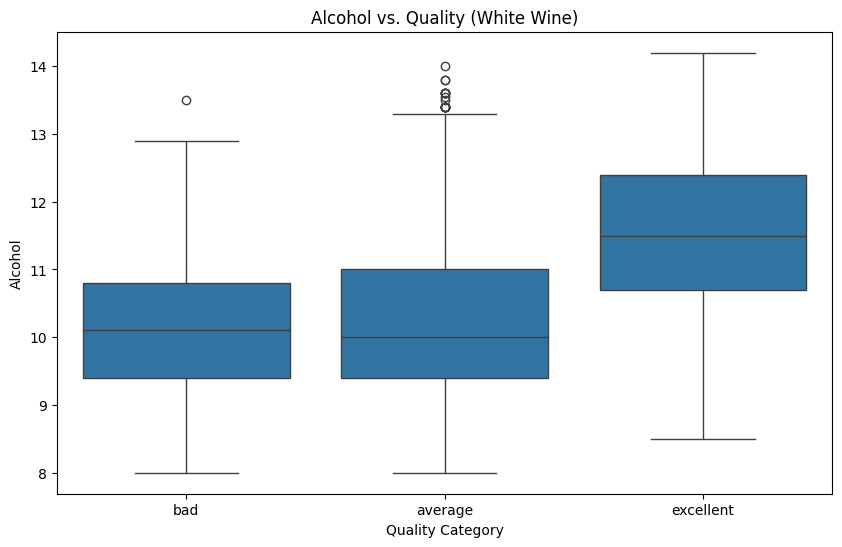

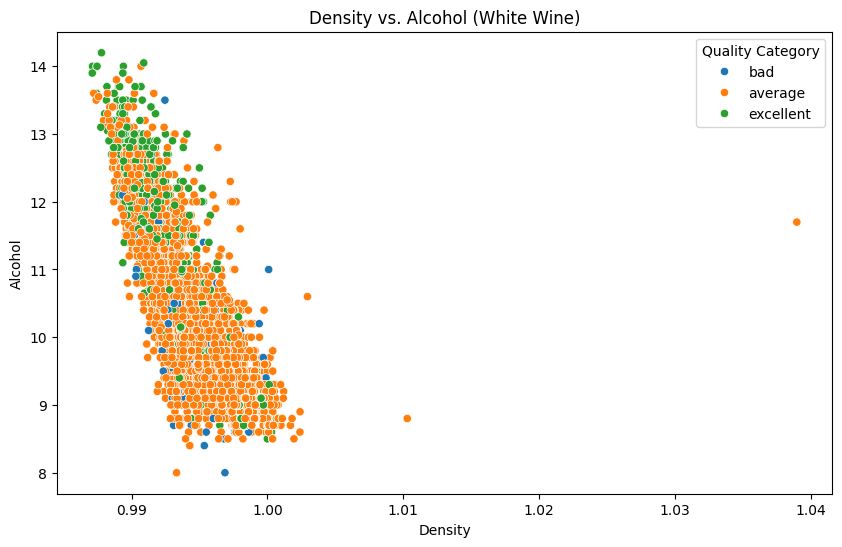

In [6]:
# fixed acidity vs. pH
plt.figure(figsize=(10, 6))
sns.scatterplot(x='fixed acidity', y='pH', hue='quality_category', data=data_white)
plt.title('Fixed Acidity vs. pH (White Wine)')
plt.xlabel('Fixed Acidity')
plt.ylabel('pH')
plt.legend(title='Quality Category')
plt.show()

# alcohol vs. quality
plt.figure(figsize=(10, 6))
sns.boxplot(x='quality_category', y='alcohol', data=data_white)
plt.title('Alcohol vs. Quality (White Wine)')
plt.xlabel('Quality Category')
plt.ylabel('Alcohol')
plt.show()

# density vs. alcohol
plt.figure(figsize=(10, 6))
sns.scatterplot(x='density', y='alcohol', hue='quality_category', data=data_white)
plt.title('Density vs. Alcohol (White Wine)')
plt.xlabel('Density')
plt.ylabel('Alcohol')
plt.legend(title='Quality Category')
plt.show()

pH and Acidity Analysis

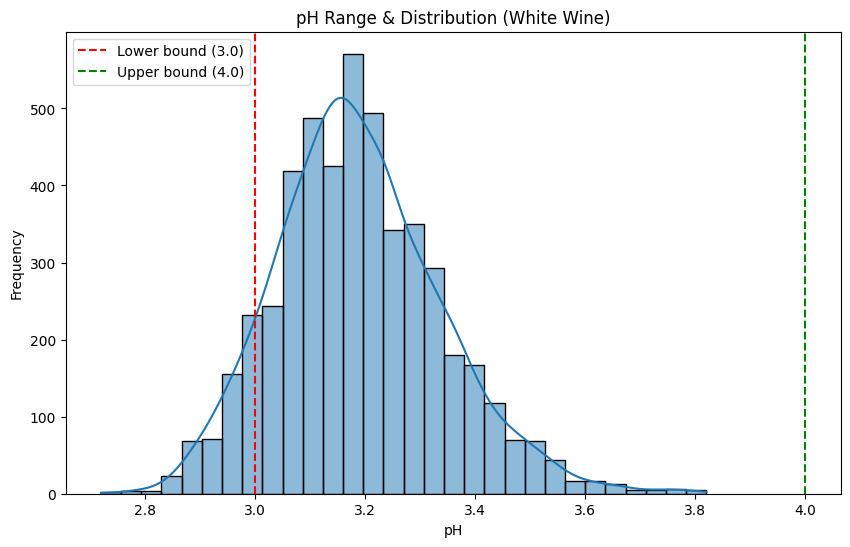

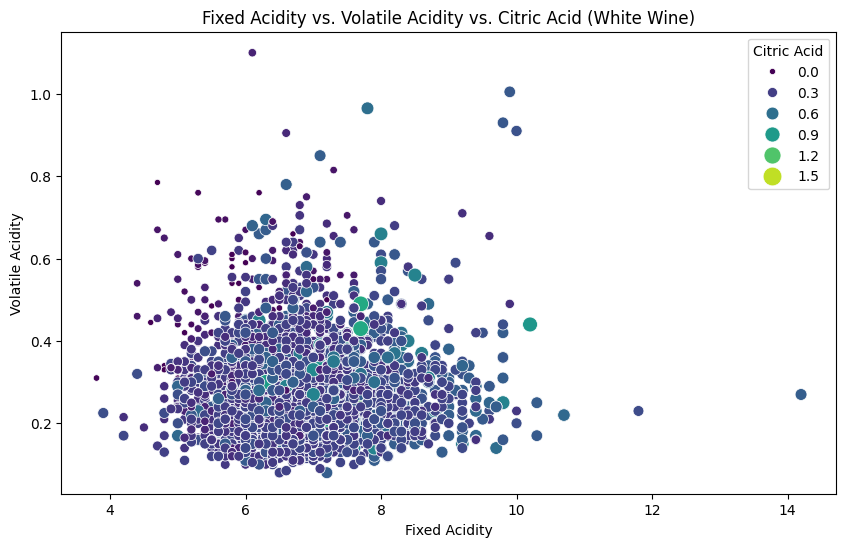

In [7]:
# pH Range & Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data_white['pH'], bins=30, kde=True)
plt.axvline(x=3.0, color='r', linestyle='--', label='Lower bound (3.0)')
plt.axvline(x=4.0, color='g', linestyle='--', label='Upper bound (4.0)')
plt.title('pH Range & Distribution (White Wine)')
plt.xlabel('pH')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Acidity Composition Breakdown
plt.figure(figsize=(10, 6))
sns.scatterplot(x='fixed acidity', y='volatile acidity', hue='citric acid', size='citric acid', data=data_white, palette='viridis', sizes=(20, 200))
plt.title('Fixed Acidity vs. Volatile Acidity vs. Citric Acid (White Wine)')
plt.xlabel('Fixed Acidity')
plt.ylabel('Volatile Acidity')
plt.legend(title='Citric Acid')
plt.show()

Sulfur Dioxide Effects

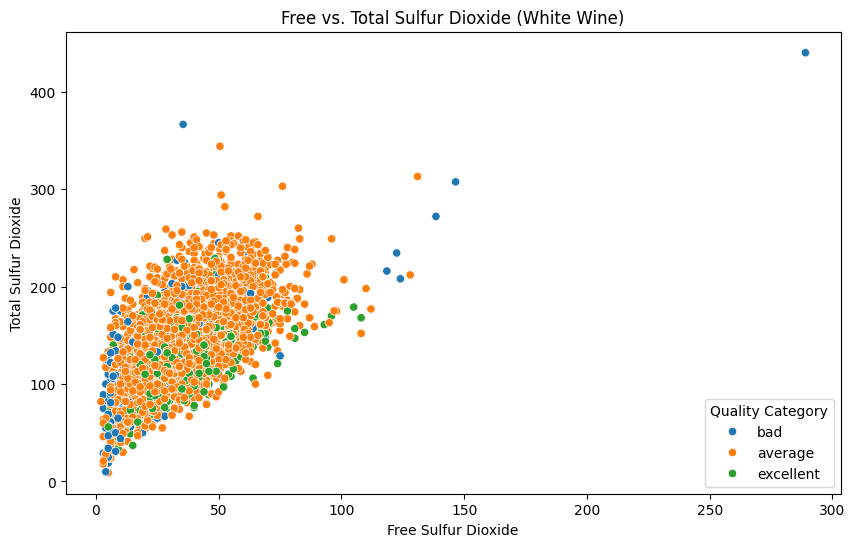

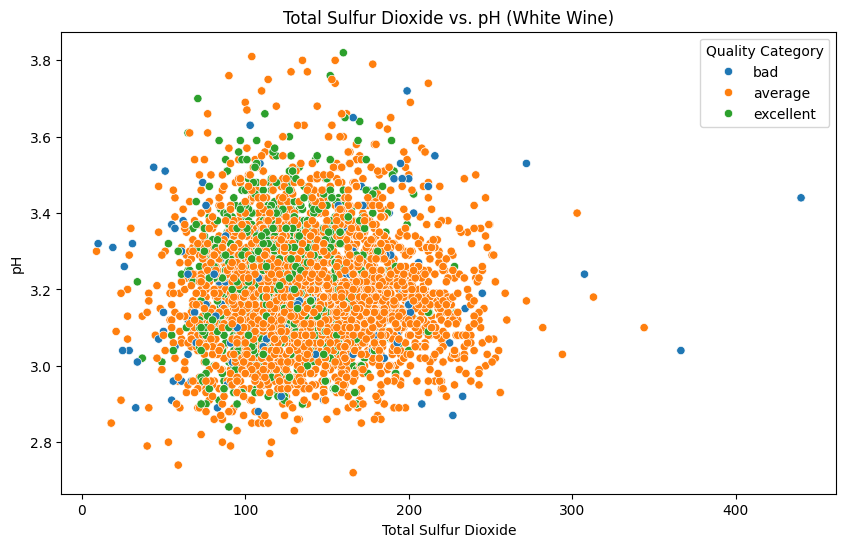

In [8]:
# Free vs. Total Sulfur Dioxide
plt.figure(figsize=(10, 6))
sns.scatterplot(x='free sulfur dioxide', y='total sulfur dioxide', hue='quality_category', data=data_white)
plt.title('Free vs. Total Sulfur Dioxide (White Wine)')
plt.xlabel('Free Sulfur Dioxide')
plt.ylabel('Total Sulfur Dioxide')
plt.legend(title='Quality Category')
plt.show()

# Sulfur Dioxide and pH Relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total sulfur dioxide', y='pH', hue='quality_category', data=data_white)
plt.title('Total Sulfur Dioxide vs. pH (White Wine)')
plt.xlabel('Total Sulfur Dioxide')
plt.ylabel('pH')
plt.legend(title='Quality Category')
plt.show()

Density Analysis

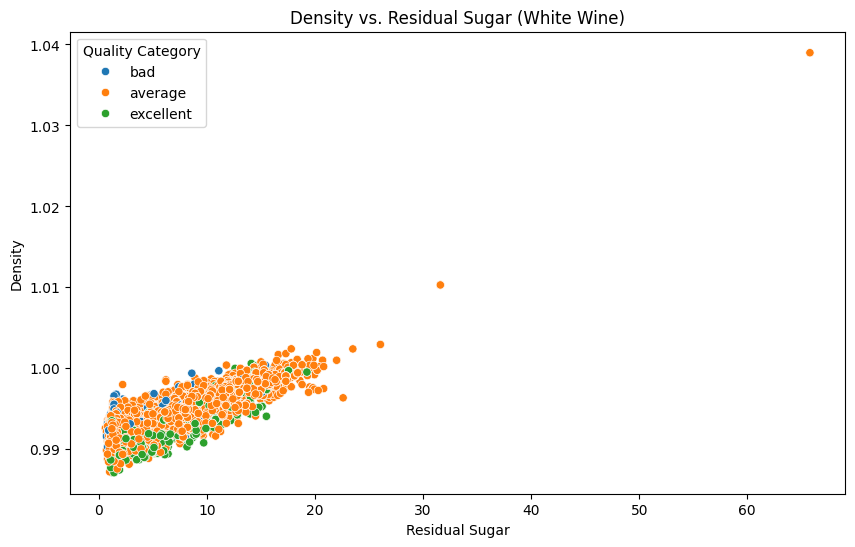

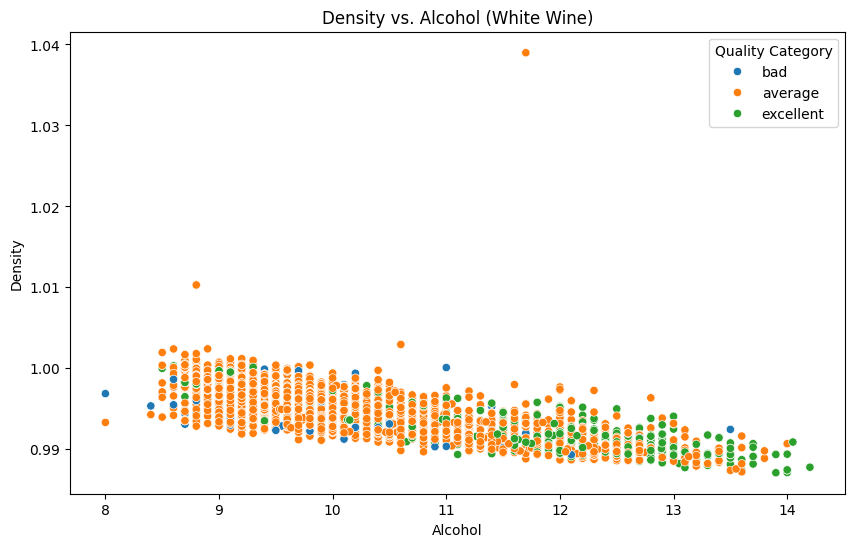

In [9]:
# Density vs. Residual Sugar
plt.figure(figsize=(10, 6))
sns.scatterplot(x='residual sugar', y='density', hue='quality_category', data=data_white)
plt.title('Density vs. Residual Sugar (White Wine)')
plt.xlabel('Residual Sugar')
plt.ylabel('Density')
plt.legend(title='Quality Category')
plt.show()

# Density vs. Alcohol
plt.figure(figsize=(10, 6))
sns.scatterplot(x='alcohol', y='density', hue='quality_category', data=data_white)
plt.title('Density vs. Alcohol (White Wine)')
plt.xlabel('Alcohol')
plt.ylabel('Density')
plt.legend(title='Quality Category')
plt.show()

Feature Engineering

In [10]:
# Feature Engineering: Creating new features
data_white['acidity_ratio'] = data_white['fixed acidity'] / data_white['volatile acidity']
data_white['sulfur_balance'] = data_white['free sulfur dioxide'] / data_white['total sulfur dioxide']
data_white['sugar_alcohol_ratio'] = data_white['residual sugar'] / data_white['alcohol']

# Display the first few rows to verify the new features
print(data_white[['acidity_ratio', 'sulfur_balance', 'sugar_alcohol_ratio']].head())

   acidity_ratio  sulfur_balance  sugar_alcohol_ratio
0      25.925926        0.264706             2.352273
1      21.000000        0.106061             0.168421
2      28.928571        0.309278             0.683168
3      31.304348        0.252688             0.858586
4      31.304348        0.252688             0.858586


Code to train the model

In [11]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Define the features and target
X = data_white.drop(columns=['quality', 'quality_category'])
y = data_white['quality_category']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Resample the training data using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Perform cross-validation and get predictions
y_train_pred_cv = cross_val_predict(rf, X_train_resampled, y_train_resampled, cv=5)

# Generate classification report
print("Classification Report:\n", classification_report(y_train_resampled, y_train_pred_cv))

# Perform cross-validation and get scores
cv_scores = cross_val_score(rf, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')

print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean Cross-Validation Score: {cv_scores.mean()}')

Classification Report:
               precision    recall  f1-score   support

     average       0.92      0.84      0.88      2932
         bad       0.96      0.98      0.97      2932
   excellent       0.88      0.94      0.91      2932

    accuracy                           0.92      8796
   macro avg       0.92      0.92      0.92      8796
weighted avg       0.92      0.92      0.92      8796

Cross-Validation Scores: [0.90568182 0.91245026 0.93405344 0.92211484 0.92723138]
Mean Cross-Validation Score: 0.9203063465812186
